# Introduction

We are going to calculate the volatility/Standard Deviation of two investment portfolios.
In the first portfolio, we are considering 3 stocks of the same (Automotive) industry i.e. Daimler AG, Bayerische Motoren Werke AG (BMW), and Volkswagen AG.
The second portfolio consists of 3 stocks i.e. Deutsche Bank AG, The Boeing Company, McDonald's Corporation from different industries.
We are going to find the volatility of the portfolio for 1 year (01.01.2019 to 31.12.2019).

# Importing the Libraries 

In [122]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Stock information from Yahoo Finance

In [123]:
first_tickers = ['DAI.DE', 'BMW.DE', 'VOW3.DE']
second_tickers = ['DBK.DE', 'BA', 'MCD']

first_portfolio_weights = np.array([0.35, 0.35, 0.30])
second_portfolio_weights = np.array([0.40, 0.20, 0.40])

first_portfolio = pd.DataFrame()
second_portfolio = pd.DataFrame()

for ticker in first_tickers:
    first_portfolio[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2019-1-1', end= '2019-12-31')['Adj Close']
    
for ticker in second_tickers:
    second_portfolio[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2019-1-1', end= '2019-12-31')['Adj Close']

# Getting familiar with both portfolios

# First Portfolio

In [125]:
first_portfolio.describe()

,DAI.DE,BMW.DE,VOW3.DE
count,251.000000,251.000000,251.000000
mean,46.591049,63.915035,152.313017
std,3.118977,3.955086,13.722418
min,39.100929,55.582966,130.365051
25%,44.942434,61.035337,142.486092
50%,46.651890,63.906204,147.820007
75%,48.233704,66.556953,156.338776
max,53.560268,71.860153,184.240005


In [126]:
first_portfolio.head()

,DAI.DE,BMW.DE,VOW3.DE
Date,,,
2019-01-02,40.863297,62.725433,131.816132
2019-01-03,40.434345,62.104832,130.365051
2019-01-04,42.506859,64.497284,135.898514
2019-01-07,42.588131,64.866051,136.053299
2019-01-08,42.895176,64.946999,138.336334


# Second Portfolio

In [117]:
second_portfolio.describe()

,DBK.DE,BA,MCD
count,251.000000,245.000000,245.000000
mean,6.992479,359.097364,193.282651
std,0.510856,23.102697,13.222055
min,5.883000,302.100555,167.695847
25%,6.587000,343.108063,182.751938
50%,6.989000,356.289032,192.945541
75%,7.360735,370.172058,205.844559
max,8.033767,430.299988,215.830231


In [118]:
second_portfolio.head()

,DBK.DE,BA,MCD
Date,,,
2019-01-02,7.027211,314.645142,169.710464
2019-01-03,6.977080,302.100555,168.592285
2019-01-04,7.309322,317.822601,171.850388
2019-01-07,7.422363,318.823395,173.720444
2019-01-08,7.493136,330.891937,174.086731


# Normalization to 100: (Current Price / Initial Price) * 100
We are going to normalize to a hundred (so that every stock have the same starting point in the Graph) and plot the Information

# First Portfolio

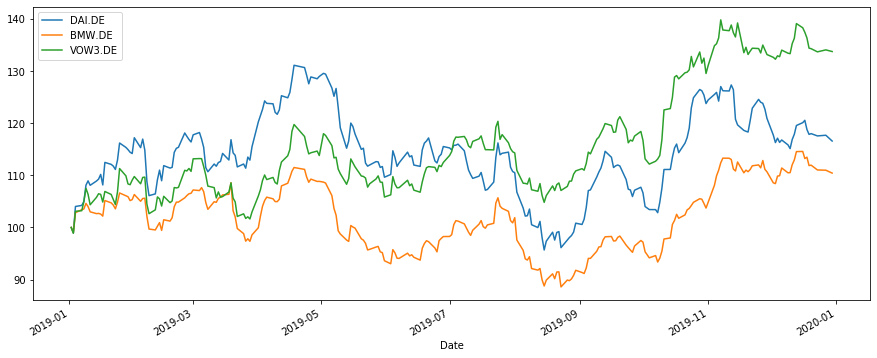

In [119]:
(first_portfolio / first_portfolio.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

# Second Portfolio

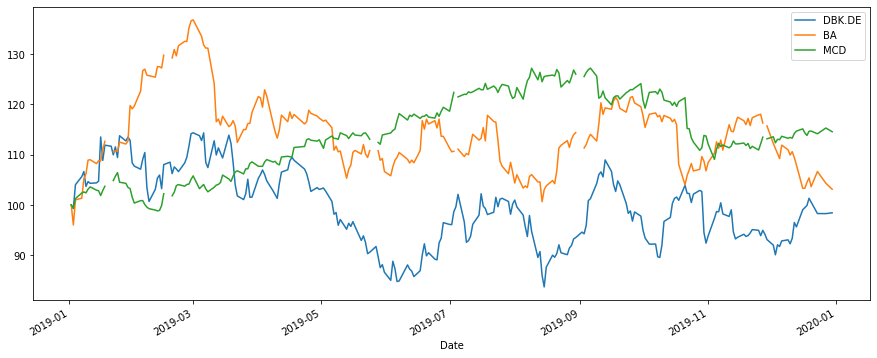

In [120]:
(second_portfolio / second_portfolio.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

In the first figure, the price development of stocks which are from the same industry/country follows a similar trend.
On the contrary, the second figure shows we can observe less association among the stocks.
We are going to cover the mathematical part in the following sections.

# Return of the Portfolio

In [127]:
first_portfolio_day_returns = first_portfolio.pct_change()
second_portfolio_day_returns = second_portfolio.pct_change()

#Calculating the volatility/Standard Deviation of the first portfolio
cov_first_portfolio_day = first_portfolio_day_returns.cov()
cov_first_portfolio_annual = cov_first_portfolio_day * 250
first_portfolio_variance = np.dot(first_portfolio_weights.T, np.dot(cov_first_portfolio_annual, first_portfolio_weights))
first_portfolio_volatility = np.sqrt(first_portfolio_variance)

#Calculating the volatility/Standard Deviation of the second portfolio
cov_second_portfolio_day = second_portfolio_day_returns.cov()
cov_second_portfolio_annual = cov_second_portfolio_day * 250
second_portfolio_variance = np.dot(second_portfolio_weights.T, np.dot(cov_second_portfolio_annual, second_portfolio_weights))
second_portfolio_volatility = np.sqrt(second_portfolio_variance)

print ("The Standard Deviation of the first portfolio is : ",round(first_portfolio_volatility*100,2), "%")
print ("The Standard Deviation of the second portfolio is: ",round(second_portfolio_volatility*100,2), "%")

The Standard Deviation of the first portfolio is :  21.29 %
The Standard Deviation of the second portfolio is:  17.49 %


# Conclusion:
We can see that the Standard Deviation or Volatility is higher in the first portfolio due to its lower diversification. On the other hand, the second portfolio is less volatile due to its better diversification.